In [8]:
import numpy as np
import matplotlib.pyplot as plt
##########forward derivative################
def deriv_fw(x,dx,f):
    df_dt = (f(x+dx) - f(x)) / dx
    return df_dt
##########central derivative################
def deriv_cen(x,dx,f):
    df_dt = (f(x+dx/2.) - f(x-dx/2.)) / dx
    return df_dt

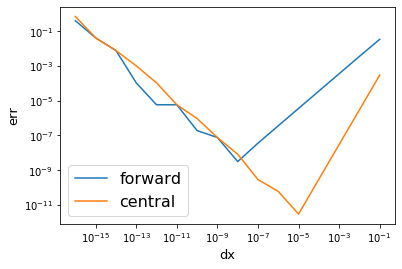

In [31]:
x0 = np.pi/4.
dx_err=[]
fw_err=[]
cen_err=[]
for dx in 10**np.arange(-16.0,0.0):
    df_dt_fw = deriv_fw(x0,dx,np.cos)
    df_dt_cen = deriv_cen(x0,dx,np.cos)
    error_fw=np.abs(df_dt_fw-(-np.sin(x0)))
    error_cen=np.abs(df_dt_cen-(-np.sin(x0)))
    dx_err.append(dx)
    fw_err.append(error_fw)
    cen_err.append(error_cen)
    

plt.loglog(dx_err, fw_err,label='forward')
plt.loglog(dx_err,cen_err,label='central')
plt.legend(fontsize=16)
plt.xlabel('dx',fontsize=13)
plt.ylabel('err',fontsize=13)
plt.show()

In [44]:
from scipy import optimize
def f_1(x, A, B):
    return A*x + B
dx_minerr_fw=dx_err[fw_err.index(min(fw_err))]
dx_minerr_cen=dx_err[cen_err.index(min(cen_err))]
print('The optimal value of x for forward derivative is ',dx_minerr_fw)
print('The optimal value of x for central derivative is ',dx_minerr_cen)

dx_truncerr_fw=[]
truncerr_fw=[]
#dx_runofferr_fw=[]
#runofferr_fw=[]

dx_truncerr_cen=[]
truncerr_cen=[]
#dx_runofferr_cen=[]
#runofferr_cen=[]

for i in range(len(dx_err)):
    if dx_err[i]>=dx_minerr_fw:
        dx_truncerr_fw.append(dx_err[i])
        truncerr_fw.append(fw_err[i])
    if dx_err[i]>=dx_minerr_cen:
        dx_truncerr_cen.append(dx_err[i])
        truncerr_cen.append(cen_err[i])


n_fw = optimize.curve_fit(f_1, np.log10(dx_truncerr_fw), np.log10(truncerr_fw))[0][0]
n_cen = optimize.curve_fit(f_1, np.log10(dx_truncerr_cen), np.log10(truncerr_cen))[0][0]
print('Error ~ dx^n for forward derivative, n=', n_fw)
print('Error ~ dx^n for central derivative, n=', n_cen)

The optimal value of x for forward derivative is  1e-08
The optimal value of x for central derivative is  1e-05
Error ~ dx^n for forward derivative, n= 1.0040737062139735
Error ~ dx^n for central derivative, n= 2.002496074019502


0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
4.9960036108132044e-08 -4.9960036108132044e-08
5.000444502911705e-07 -5.000444502911705e-07
5.000000413701855e-06 -5.000000413701855e-06
4.999999969612645e-05 -4.999999969612645e-05
0.0004999999583255033 -0.0004999999583255033
0.004999958333473664 -0.004999958333473664
0.049958347219742905 -0.049958347219742905


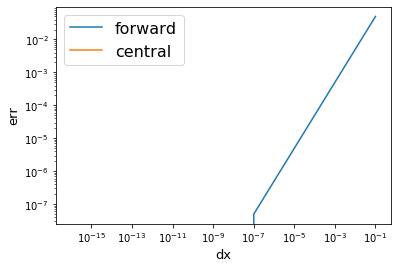

In [55]:
x0 = 0.
dx_err=[]
fw_err=[]
cen_err=[]
for dx in 10**np.arange(-16.0,0.0):
    df_dt_fw = deriv_fw(x0,dx,np.cos)
    df_dt_cen = deriv_cen(x0,dx,np.cos)
    error_fw=np.abs(df_dt_fw-(-np.sin(x0)))
    print(error_fw,df_dt_fw)
    error_cen=np.abs(df_dt_cen-(-np.sin(x0)))
    dx_err.append(dx)
    fw_err.append(error_fw)
    cen_err.append(error_cen)
    

plt.loglog(dx_err, fw_err,label='forward')
plt.loglog(dx_err,cen_err,label='central')
plt.legend(fontsize=16)
plt.xlabel('dx',fontsize=13)
plt.ylabel('err',fontsize=13)
plt.show()

The trunction error of forward difference and central difference are $y'' \times dx/2$ and $y''' \times dx^2/24$. When $x=\pi/4$, $y'' = -cos(\pi/4)={-\sqrt{2} \over 2}$, $y'''=sin(\pi/4)={\sqrt{2} \over 2}$. We have $y'' \sim y'''$ and $dx/2>dx^2/24$. Thus the trunction error of forword difference is larger than that of central difference.

When $x=0$, Then trunction error of central difference only contains sin terms. To be specific, the trunction error of central difference should be
\begin{eqnarray}
err_{cd} &=&  \frac{dx^2}{4*3!}*y'''(t)+\frac{dx^4}{2^4*5!}*y^{(5)}(t)....
         &=&  \frac{dx^2}{4*3!}*(sin(0))+\frac{dx^4}{2^4*5!}*(-sin(0))....
         &=& 0
\end{eqnarray}
The trunction error of forward difference is $dx/2$